<a href="https://colab.research.google.com/github/MFaiqKhan/classical_MachineLearning/blob/main/Linear_Regression_Single_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Single Variable: (Codebasics)**

Predict house prices through simple linear regression, Linear regression is a supervised learning algorithm.
We have input features as area sq ft of the house and output variable is the price of the house
Then we train it on a data and test it on a new data.
By the help of scatter plots we can identity the price and area.
The algorithm finds the linear relationship between the input features and the output variable by fitting a straight line equation to the training data.

We draw different line of y=mx+b and choose the line having least error , we take thew error through any minimization error technique like R2 etc.

Y = mx + b
Price = m * area + b (area = independent var, price is dependent var)
M is the slope or gradient , b is y intercept.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("houseprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


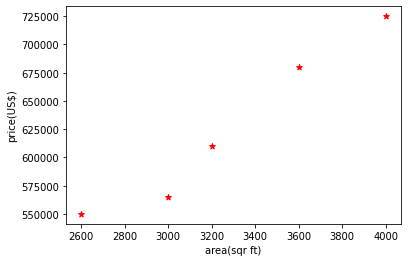

In [9]:
%matplotlib inline #  Jupyter Notebook magic command that enables the inline display of Matplotlib plots in the notebook
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color="red", marker="*")

In [10]:
reg = linear_model.LinearRegression() # create an object of linear regression
reg.fit(df[['area']],df.price) # fitting my data to the model, means training the data using the model


LinearRegression()

In scikit-learn, the predict method is used to make predictions using a trained linear regression model. The input to the predict method is an array-like object containing the values of the input variables for which you want to make predictions.

Assuming that reg is an instance of the LinearRegression class that has been trained on a dataset, the code reg.predict([[3300]]) will make a prediction for a single data point with an input variable of 3300. Specifically, it will predict the output variable (i.e., the target variable) for this data point based on the learned linear regression model.

The input to the predict method is a 2D array, even if you are only making a prediction for a single data point. In this case, the input is a 2D array with a single row and a single column, where the value 3300 is the only value in the array. This is equivalent to passing a list with a single value, like this: reg.predict([[3300]]). The output of the predict method will be a 1D array containing the predicted values for each data point in the input array. In this case, there is only one data point, so the output will be a 1D array with a single value, representing the predicted output variable for the input data point.

In [11]:
reg.predict([[3300]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

The Model calculated the value of M (slope/gradient) and b which is Y-intercept.

How we get 628715... value ?

here reg.coef_ is m value
and reg.intercept_ is the Y-value 

scikit-learn uses an algorithm called Ordinary Least Squares (OLS) to estimate the coefficients and intercept. OLS involves minimizing the sum of the squared differences between the predicted values and the actual values in the training data. The fit method of the LinearRegression class implements the OLS algorithm to learn the coefficients and intercept based on the training data.

In [16]:
reg.coef_, reg.intercept_

(array([135.78767123]), 180616.43835616432)

In [15]:
# so y=mx+b or price = reg.coef_ * area + reg.intercept_

price = 135.78767123 * 3300 + 180616.43835616432
price

628715.7534151643

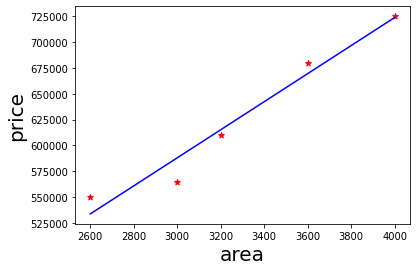

In [29]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color="red", marker="*")
plt.plot(df.area,reg.predict(df[['area']]), color='blue')


df.area is the input variable (or feature) used during training, which represents the area of the house.

`df[['area']]` is a DataFrame containing a single column, which represents the area of the house. This syntax is used to pass a 2D array (with a single column) to the predict method of the trained **LinearRegression** model, which expects a 2D array as input.

`reg.predict(df[['area']])` generates the predicted values for the input variable `df.area` using the trained **LinearRegression** model. These predicted values are used to plot the line of best fit.
**color='blue'** specifies the color of the line to be blue.

Overall, the last line of code plots the line of best fit generated by the trained **LinearRegression** model on top of the scatter plot of the original data, allowing us to visually assess the accuracy of the model's predictions.

In [24]:
d = pd.read_csv("areas.csv")
d


,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [26]:
x = reg.predict(d) # predicting the prices of different area houses by using same fit model
x

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [27]:
d["prices"] = x # adds a new column to the DataFrame d named "prices" and assigns the predicted values generated by the predict method to that column.
d.to_csv("prediction.csv", index=False) # writes the contents of the DataFrame d to a CSV file named "prediction.csv". The index=False argument specifies that the row index should not be included in the output file.